       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151


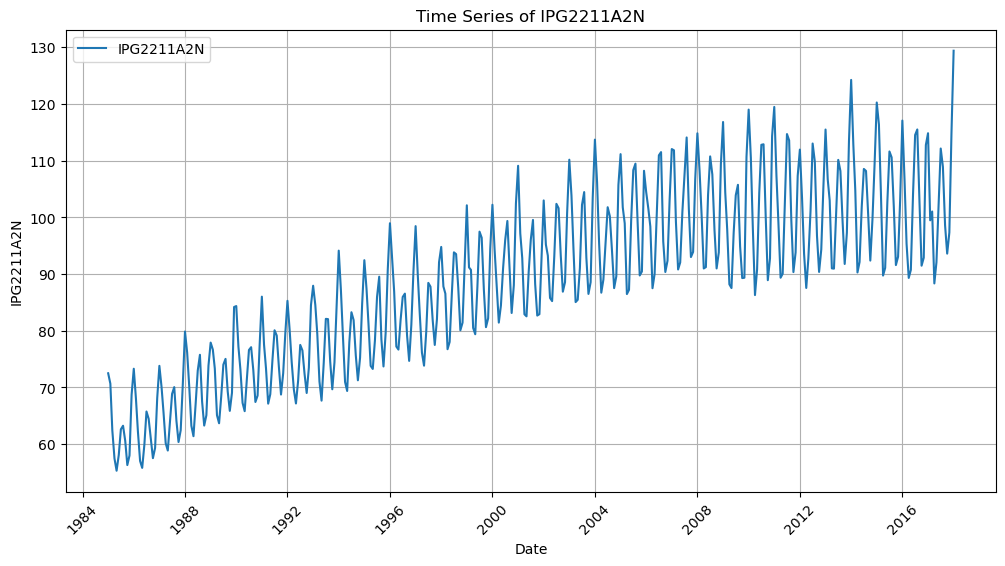

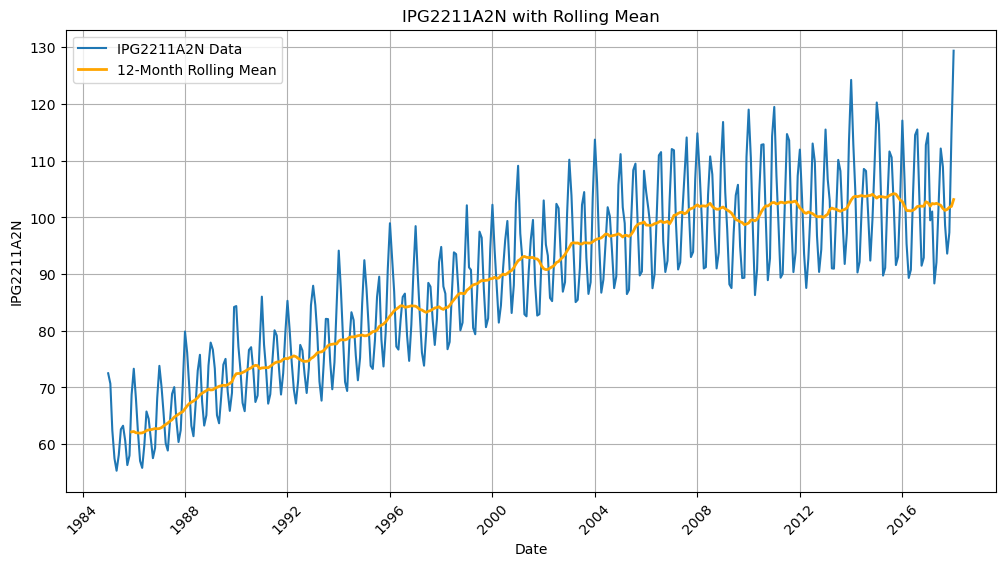

<Figure size 1200x600 with 0 Axes>

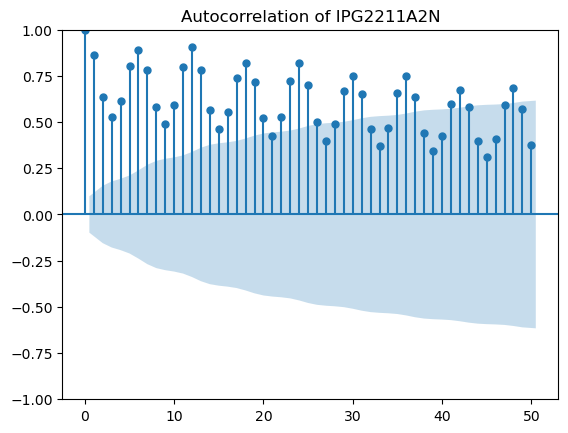

<Figure size 1200x800 with 0 Axes>

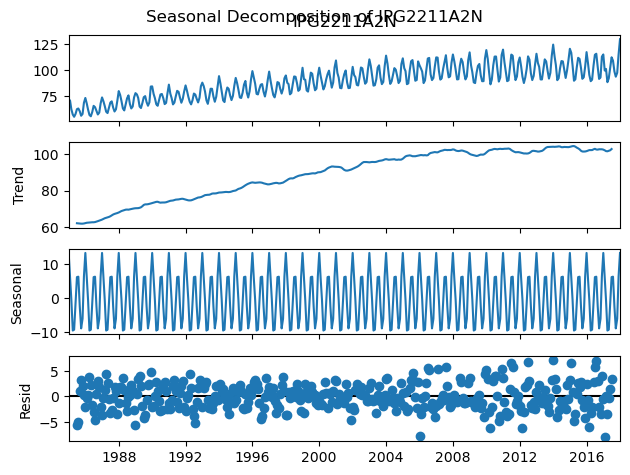

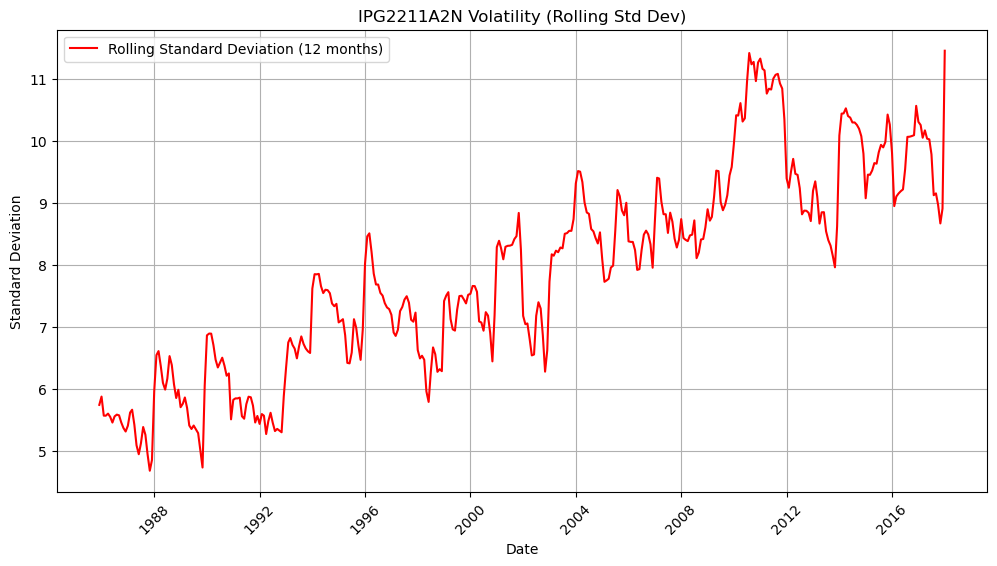

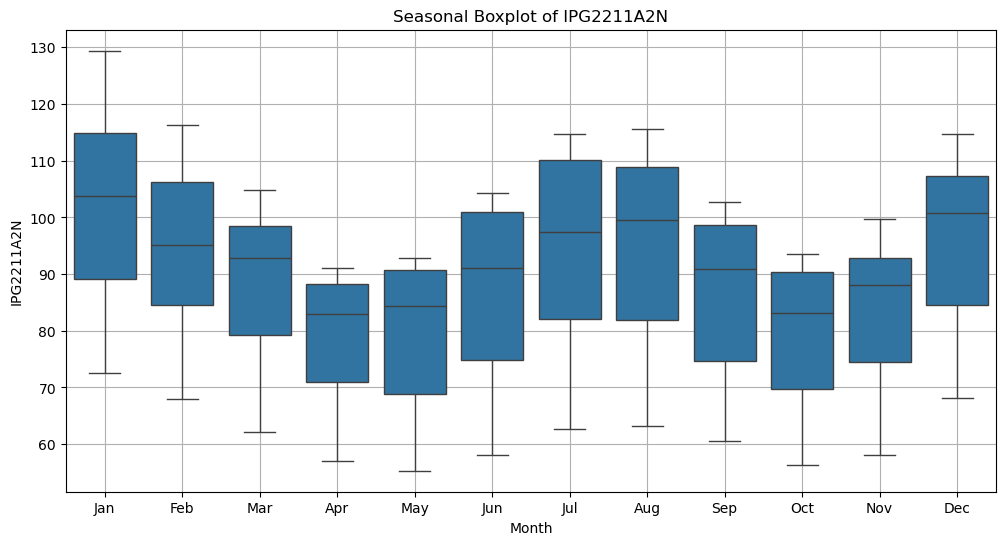

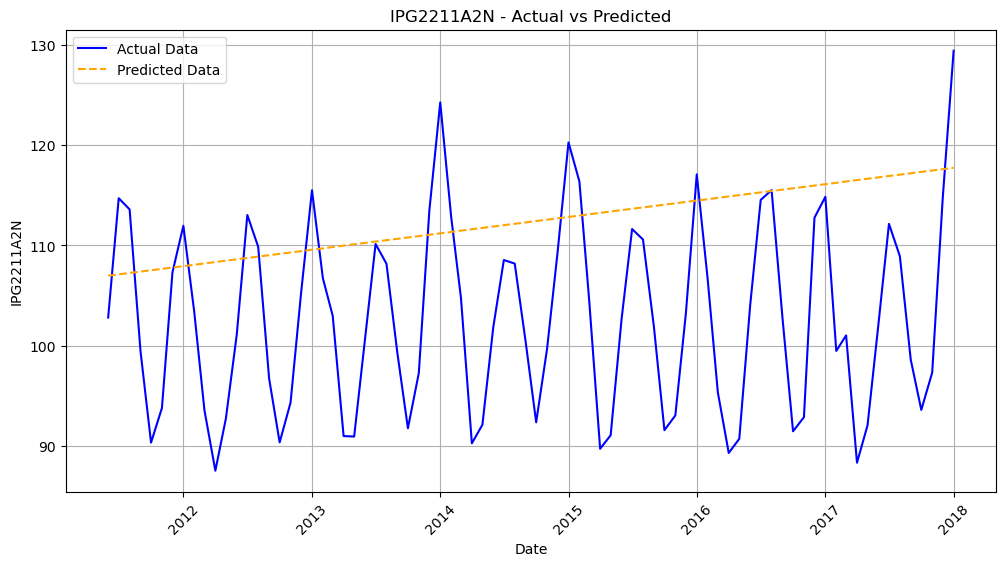

Mean Squared Error of the Regression Model: 190.4708993603595


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Registering converters to avoid warnings when plotting datetime values
register_matplotlib_converters()

# Load the dataset from the given file path
file_path = r"C:\Users\Lenovo\Downloads\Electric_Production.csv"
df = pd.read_csv(file_path)

# Checking the first few rows of the dataset to understand its structure
print(df.head())

# Convert 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Ensure the data is sorted by date
df = df.sort_values('DATE')

# Set 'DATE' column as index
df.set_index('DATE', inplace=True)

# If 'IPG2211A2N' is the target column for time-series analysis
target_column = 'IPG2211A2N'

# Check if the target column exists
if target_column in df.columns:
    # Plot the time-series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[target_column], label='IPG2211A2N')
    plt.title(f'Time Series of {target_column}')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

    # Rolling Mean (Moving Average) visualization
    rolling_mean = df[target_column].rolling(window=12).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[target_column], label=f'{target_column} Data')
    plt.plot(df.index, rolling_mean, label='12-Month Rolling Mean', color='orange', linewidth=2)
    plt.title(f'{target_column} with Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting Autocorrelation
    plt.figure(figsize=(12, 6))
    plot_acf(df[target_column], lags=50)
    plt.title(f'Autocorrelation of {target_column}')
    plt.show()

    # Seasonal Decomposition
    decomposition = seasonal_decompose(df[target_column], model='additive', period=12)
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition of {target_column}')
    plt.show()

    # Compute and plot the rolling standard deviation (volatility)
    rolling_std = df[target_column].rolling(window=12).std()
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, rolling_std, label=f'Rolling Standard Deviation (12 months)', color='red')
    plt.title(f'{target_column} Volatility (Rolling Std Dev)')
    plt.xlabel('Date')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Seasonal boxplot to observe yearly seasonality
    df['month'] = df.index.month
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='month', y=target_column, data=df)
    plt.title(f'Seasonal Boxplot of {target_column}')
    plt.xlabel('Month')
    plt.ylabel(target_column)
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()

    # ----------- Regression Model for Forecasting -----------
    
    # Create a new feature: numeric representation of the time (using the number of months)
    df['month_num'] = np.arange(len(df))

    # Prepare the features (X) and the target variable (y)
    X = df[['month_num']]  # Using 'month_num' as feature
    y = df[target_column]  # The target variable is the time series

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[len(X_train):], y_test, label='Actual Data', color='blue')
    plt.plot(df.index[len(X_train):], y_pred, label='Predicted Data', color='orange', linestyle='dashed')
    plt.title(f'{target_column} - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and print the performance metrics (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error of the Regression Model: {mse}')

else:
    print(f"Column '{target_column}' is not found in the dataset.")
